# Chương 4. HỌC MÁY

### Thuật toán PCA

PCA là kỹ thuật thống kê do Karl Pearson giới thiệu năm 1901, dùng để giảm số chiều dữ liệu. Phương pháp này tìm ra một hệ trục tọa độ mới gọi là các thành phần chính, sao cho khi chiếu dữ liệu lên các trục đó, vẫn giữ lại được nhiều thông tin nhất. Mỗi thành phần chính tương ứng với một hướng có phương sai lớn nhất, đồng nghĩa với việc chứa nhiều thông tin hơn. Các thành phần này được sắp xếp theo thứ tự giảm dần của phương sai và gần như trực giao với nhau, giúp giảm tương quan và loại bỏ sự dư thừa giữa các chiều.

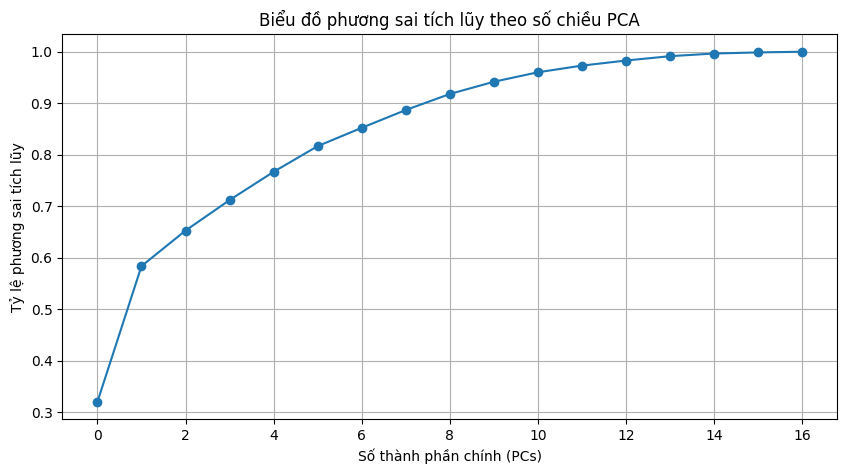

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
col = pd.read_csv('../hoc_giam_sat/data/College.csv')
col = col.select_dtypes(include=[np.number])

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(col)

# 4. Khởi tạo PCA (giữ tối đa số chiều có thể)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Vẽ biểu đồ Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Số thành phần chính (PCs)")
plt.ylabel("Tỷ lệ phương sai tích lũy")
plt.title("Biểu đồ phương sai tích lũy theo số chiều PCA")
plt.grid(True)
plt.show()


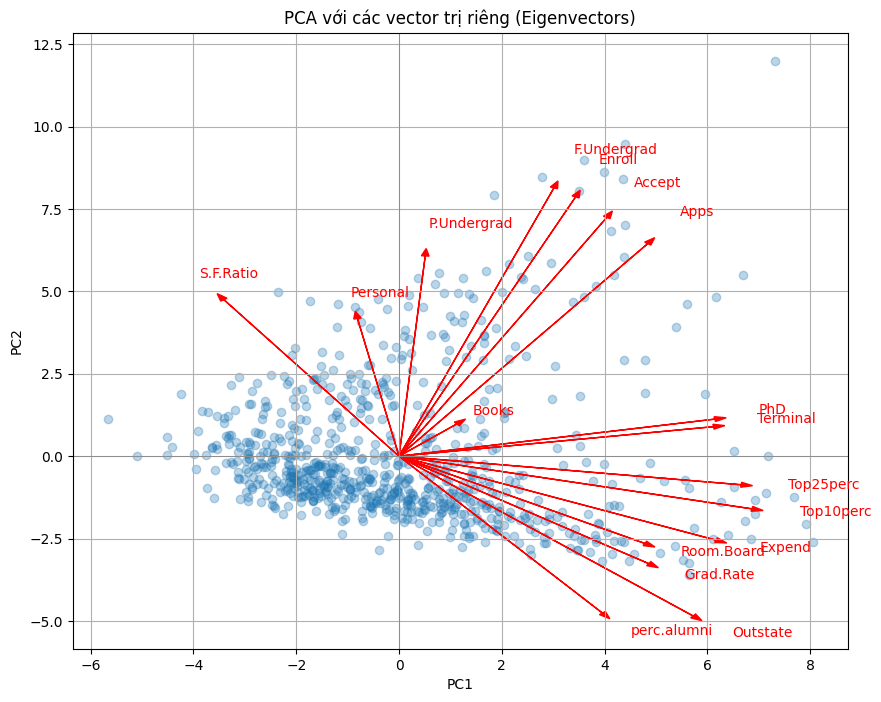

In [26]:
# 5. Lấy loading vectors (trị riêng của ma trận hiệp phương sai)
eigenvectors = pca.components_.T   # shape: (n_features, 2)
feature_names = col.columns
# ----------------------
# 6. VẼ PCA + vectors
# ----------------------
plt.figure(figsize=(10, 8))

# Scatter PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA với các vector trị riêng (Eigenvectors)")

# Scale mũi tên cho vừa hình (hệ số tùy chỉnh)
arrow_size = 20.0  

for i, feature in enumerate(feature_names):
    x_vec = eigenvectors[i, 0] * arrow_size
    y_vec = eigenvectors[i, 1] * arrow_size

    # Vẽ vector
    plt.arrow(0, 0, x_vec, y_vec, 
              color='red', 
              head_width=0.15, 
              length_includes_head=True)

    # Tên biến
    plt.text(x_vec * 1.1, y_vec * 1.1, feature, color='red')

plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()